# DA5401: A2 Dimensionality Reduction, Visualization, and Classification Performance


### _OBJECTIVE: To apply concepts of vector spaces, dimensionality reduction, and feature engineering to a real-world classification problem. Use Principal Component Analysis (PCA) to reduce the data's dimensionality and then evaluate how this reduction affects the performance of a Logistic Regression classifier_


# Mushroom Classification: A Study in Dimensionality Reduction


# Part A: Exploratory Data Analysis (EDA) & Preprocessing


## Chapter 1: Data Acquisition and Some Preprocessing

The analysis commences with the Mushroom Dataset, a collection characterized by numerous attributes and entirely categorical features. The primary objective is to classify mushrooms based on these attributes as either edible or poisonous. This dataset's inherent dimensionality presents an opportunity to explore dimensionality reduction techniques.

The initial steps involve loading the data and examining its basic structure to understand the variables and data types present, and performing some initial data cleaning.

1.  **Data Loading**: Load the mushroom dataset into a pandas DataFrame.
2.  **Initial Inspection**: Display the first few rows and review the data information (data types, non-null values) to get a foundational understanding of the dataset.
3.  **Data Cleaning**: Identify and remove columns with only one unique value, as these columns provide no discriminatory information.


In [1]:
# Importing the necessary libraries
import numpy as np  # For numerical operations and array manipulation
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating static visualizations
import seaborn as sns  # For statistical data visualization based on matplotlib

In [2]:
# Load the mushroom dataset from a CSV file into a pandas DataFrame
df = pd.read_csv("mushrooms.csv")

In [3]:
# Display the first 5 rows of the dataframe to inspect its structure and content
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
# Print the dimensions of the dataframe (number of rows, number of columns)
print(df.shape)

(8124, 23)


In [5]:
# Display concise summary of the DataFrame including:
# - Total number of entries
# - Column names and their data types
# - Non-null value counts
# - Memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
# Check for columns with only one unique value and drop them
cols_to_drop = []
for col in df.columns:
    # Count unique values in each column
    if df[col].nunique() == 1:
        # If only one unique value exists, add to drop list
        cols_to_drop.append(col)

# Process columns to drop if any were found
if cols_to_drop:
    print(f"Dropping columns with only one unique value: {cols_to_drop}")
    # Remove the identified columns from the dataframe
    df = df.drop(columns=cols_to_drop)
    print("Columns dropped.")
else:
    # Inform user if no columns need to be dropped
    print("No columns found with only one unique value.")

# Display the info again to see the effect of dropping columns
print("\nUpdated DataFrame Info:")
df.info()

# Display the head again to see the effect of dropping columns
print("\nUpdated DataFrame Head:")
display(df.head())

Dropping columns with only one unique value: ['veil-type']
Columns dropped.

Updated DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


## Chapter 2: Feature Engineering

Machine learning algorithms, particularly those that analyze variance and distance like PCA, require numerical data.

1.  **Feature-Target Separation**: Distinguish the features (`X`) used for prediction from the target variable (`y`) representing the mushroom class.
2.  **Target Encoding**: Convert the nominal target variable ('e' for edible, 'p' for poisonous) into a numerical format (0, 1).
3.  **One-Hot Encoding**: Apply One-Hot Encoding to the categorical feature set (`X`).

**Why One-Hot Encoding Prior to PCA?**

- PCA is a variance-based technique operating within vector spaces defined by numerical features. PCA Understands Only Numbers: It uses math (like measuring distances and variance), which only works on numbers. It can't understand text categories like 'red', 'green', or 'blue' on its own.
- Categorical variables lack inherent numerical magnitude or order. Directly assigning numerical labels would impose an artificial ordinal scale.
- One-Hot Encoding is the Solution: This technique translates categories into numbers without creating a fake ranking. It takes a single column like cap-color and creates a new, separate column for each color.
  Instead of one column with the word 'red', you get a column named is_red with a 1 (for yes) or 0 (for no).It does this for every color, so each category becomes its own independent, numerical feature.This allows PCA to analyze the categories mathematically, treating each one as a distinct concept without any artificial order.


In [7]:
from sklearn.preprocessing import OneHotEncoder

# Separate features and target variable
X = df.drop('class', axis=1)  # Features: all columns except 'class'
y = df['class'].map({'e': 0, 'p': 1})  # Target: convert 'e' to 0 and 'p' to 1

# Initialize and fit the encoder on the entire dataset
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # Create encoder that handles unknown categories and returns dense array
X_encoded = encoder.fit_transform(X)  # Transform categorical features into one-hot encoded format

# Display the encoded feature matrix
X_encoded

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Chapter 3: Data Scaling - Standardization

Standardization is a critical preprocessing step for PCA. It involves transforming features to have a mean of 0 and a standard deviation of 1. This is necessary even for binary features.

1.  **Standardization Implementation**: Apply `StandardScaler` from scikit-learn to the one-hot encoded features.

**Importance of Standardization for One-Hot Encoded Data:**

- While one-hot encoded features are binary, the distribution and variance of these binary features can differ based on the frequency of the original categories in the dataset.
- PCA calculations are based on the covariance matrix, which is influenced by feature variances. Features with higher variances (e.g., representing categories that appear more frequently) would disproportionately affect the principal components.
- Standardization ensures that each feature contributes equally to the variance calculation by scaling them to a common range. This prevents features with higher frequencies from having an undue influence on the determined principal components, leading to a more robust PCA result that reflects the underlying data structure rather than the scale of specific features.


In [8]:
# Initialize and fit the scaler on the entire encoded dataset
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object to standardize features
# StandardScaler transforms features by removing the mean and scaling to unit variance
scaler = StandardScaler()

# Apply the scaler to the encoded data
# fit_transform() first calculates the mean and variance of each feature,
# then transforms the data by subtracting the mean and dividing by the standard deviation
X_standardized = scaler.fit_transform(X_encoded)

# Print confirmation message and the shape of the standardized dataset
print("Master preprocessed dataset ('X_standardized') is ready!")
print(f"Shape: {X_standardized.shape}")

Master preprocessed dataset ('X_standardized') is ready!
Shape: (8124, 116)


In [9]:
X_standardized  # Access the standardized feature matrix

array([[-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
         4.59086996, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [ 4.11988487, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       ...,
       [-0.24272523, -0.02219484,  1.2559503 , ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197]])

# Part B: Principal Component Analysis (PCA)


## Chapter 4: Applying Principal Component Analysis

With the data scaled, we proceed with Principal Component Analysis. PCA identifies a new set of orthogonal axes (principal components) ordered by the amount of variance they capture from the original data.

1.  **PCA Application**: Perform PCA on the standardized dataset without initially limiting the number of components. This provides the explained variance for all possible principal components.


In [10]:
from sklearn.decomposition import PCA

# 1. Initialize PCA to find all possible components
# Creating a PCA object without specifying n_components will retain all components
pca = PCA()

# 2. Fit PCA on our entire standardized dataset
# This step calculates the principal components, eigenvalues, and explained variance
print("Fitting PCA on the entire dataset...")
pca.fit(X_standardized)

print("PCA has been successfully fitted. The results are now stored in the 'pca' object.")

Fitting PCA on the entire dataset...
PCA has been successfully fitted. The results are now stored in the 'pca' object.


## Chapter 5: The Scree Plot

The Scree Plot is an essential visualization for understanding how the total variance is distributed across the principal components and for guiding the selection of the number of components to retain.

1.  **Scree Plot Generation**: Create a plot displaying the explained variance ratio of each individual principal component and the cumulative explained variance ratio.
2.  **Optimal Component Determination**: Identify the minimum number of components required to explain a substantial proportion of the total variance, commonly set at 95%.


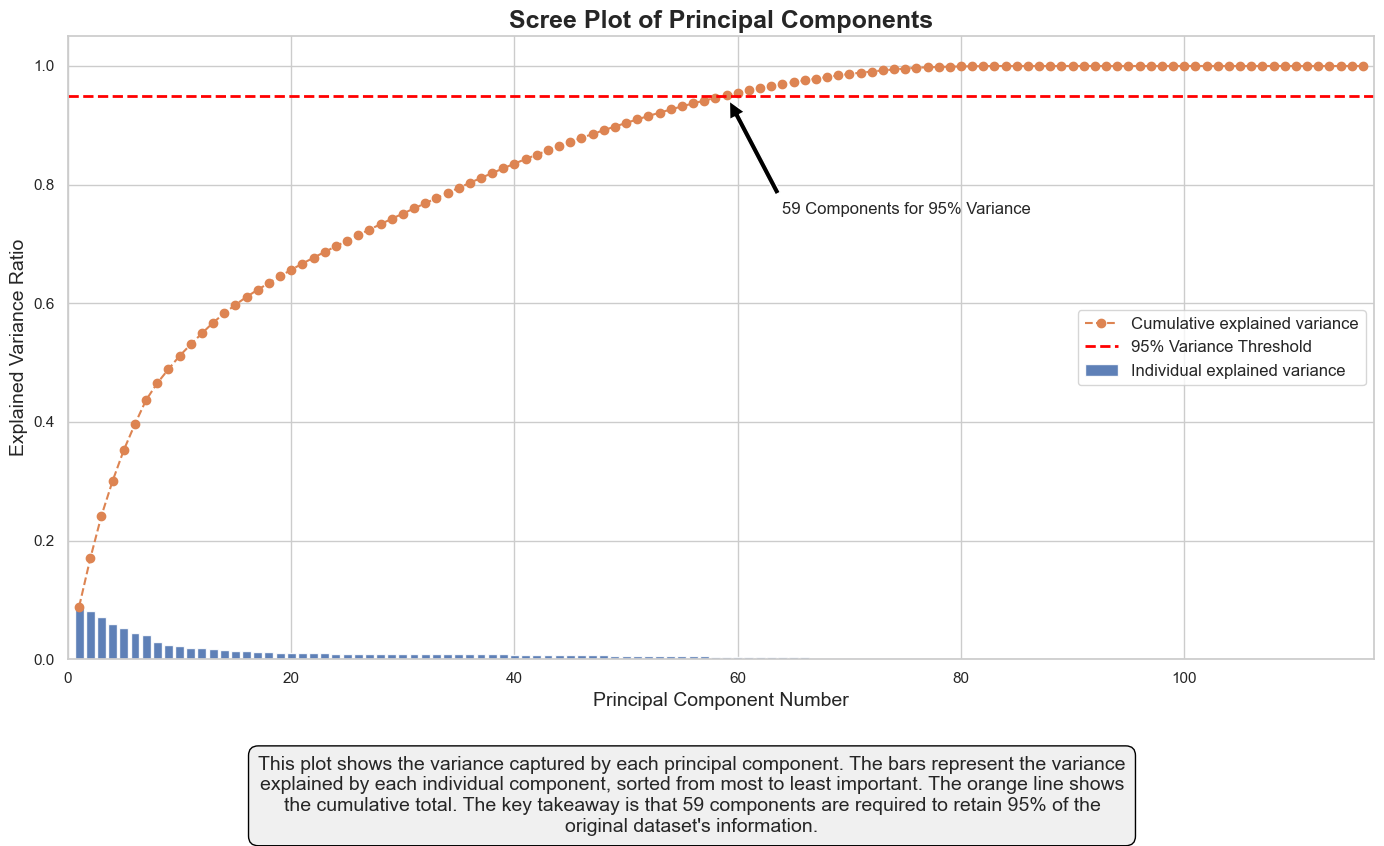

In [11]:
sns.set_theme(style="whitegrid")

# Prepare Data
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
optimal_components = np.where(cumulative_variance >= 0.95)[0][0] + 1

# Create the Plot
fig, ax = plt.subplots(figsize=(14, 8))

# Use Seaborn's default color palette
colors = sns.color_palette()
ax.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.9, align='center',
        label='Individual explained variance', color=colors[0]) # Blue
ax.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--',
         color=colors[1], label='Cumulative explained variance') # Orange

# Add Annotations & Formatting
ax.axhline(y=0.95, color='red', linestyle='--', linewidth=2, label='95% Variance Threshold')

ax.annotate(f'{optimal_components} Components for 95% Variance',
             xy=(optimal_components, 0.95),
             xytext=(optimal_components + 5, 0.75),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12)

# Set labels and title
ax.set_ylabel('Explained Variance Ratio', fontsize=14)
ax.set_xlabel('Principal Component Number', fontsize=14)
ax.set_title('Scree Plot of Principal Components', fontsize=18, weight='bold')
ax.legend(loc='center right', fontsize=12)
ax.set_xlim(0, len(explained_variance) + 1)

# Add the Description Box 
description = (
    "This plot shows the variance captured by each principal component. The bars represent the variance\n"
    "explained by each individual component, sorted from most to least important. The orange line shows\n"
    "the cumulative total. The key takeaway is that {} components are required to retain 95% of the\n"
    "original dataset's information."
).format(optimal_components)

fig.text(0.5, -0.05, description, ha='center', fontsize=14,
         bbox=dict(boxstyle="round,pad=0.5", fc="#f0f0f0", ec="black", lw=1))

plt.tight_layout(rect=[0, 0.08, 1, 1])
plt.show()

## Chapter 6: Visualizing Data in Reduced Dimensions

To gain a qualitative understanding of how the data distributes in the reduced PCA space, we create visualizations based on the principal components.

1.  **2D Projection Visualization**: Project the standardized data onto the first two principal components and generate a scatter plot, differentiating classes by color and marker style.
2.  **Multi-Dimensional Pair Plots**: Create a matrix of scatter plots (pair plot) for the top five principal components to examine relationships between different pairs of prominent components.
3.  **Separability Analysis**: Based on these visualizations, discuss the apparent linear separability of the two mushroom classes in the reduced feature space.


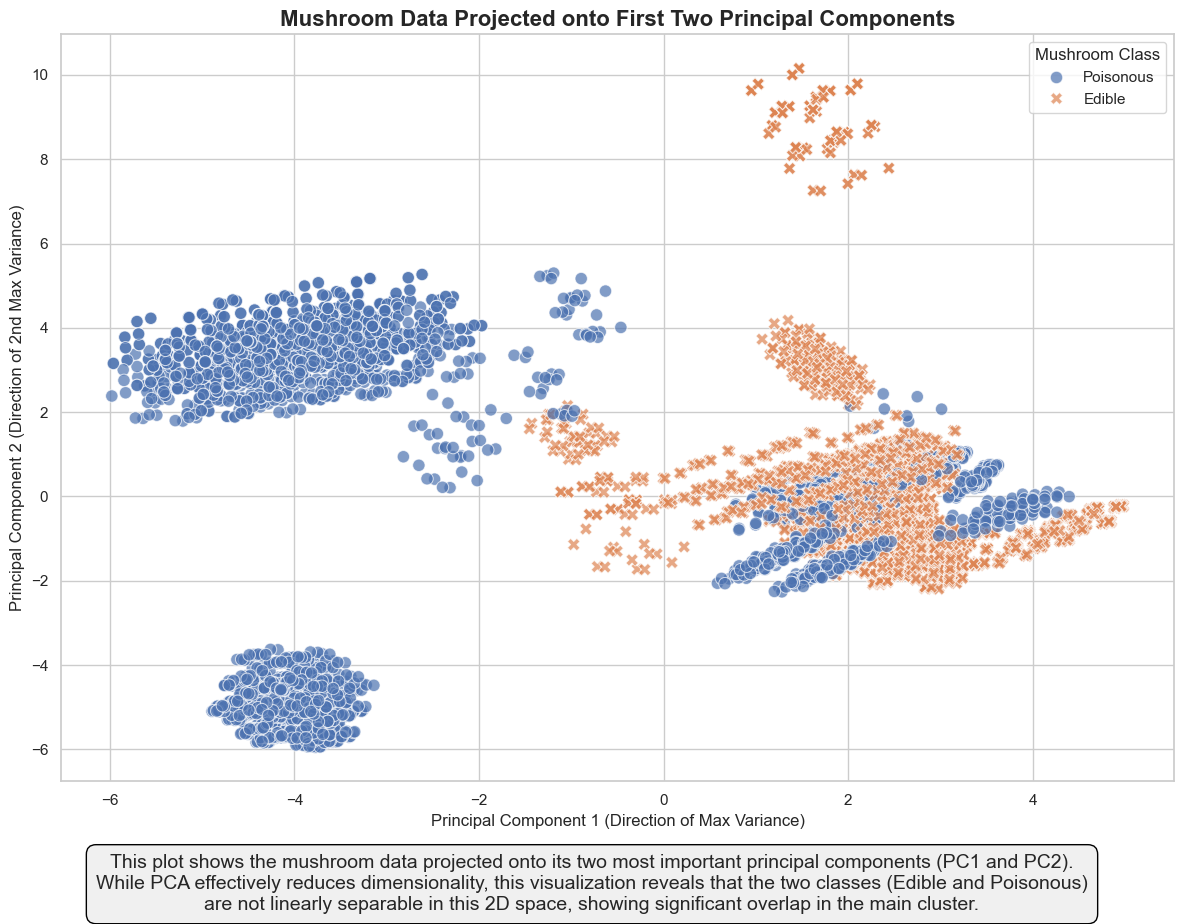

In [12]:
sns.set_theme(style="whitegrid")

# Perform 2D PCA
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_standardized)

# Create a DataFrame for Plotting 
df_pca_2d = pd.DataFrame(
    data=X_pca_2d,
    columns=['PC1', 'PC2']
)
df_pca_2d['species'] = y.map({0: 'Edible', 1: 'Poisonous'})

# Create the Plot
fig, ax = plt.subplots(figsize=(12, 9)) # Use subplots for more control

sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='species',
    style='species',
    data=df_pca_2d,
    s=80,
    alpha=0.7,
    ax=ax 
)

ax.set_title('Mushroom Data Projected onto First Two Principal Components', fontsize=16, weight='bold')
ax.set_xlabel('Principal Component 1 (Direction of Max Variance)', fontsize=12)
ax.set_ylabel('Principal Component 2 (Direction of 2nd Max Variance)', fontsize=12)
ax.legend(title='Mushroom Class')

# Add the Description Box 
description = (
    "This plot shows the mushroom data projected onto its two most important principal components (PC1 and PC2).\n"
    "While PCA effectively reduces dimensionality, this visualization reveals that the two classes (Edible and Poisonous)\n"
    "are not linearly separable in this 2D space, showing significant overlap in the main cluster."
)

fig.text(0.5, -0.02, description, ha='center', fontsize=14,
         bbox=dict(boxstyle="round,pad=0.5", fc="#f0f0f0", ec="black", lw=1))

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

Creating pair plots...


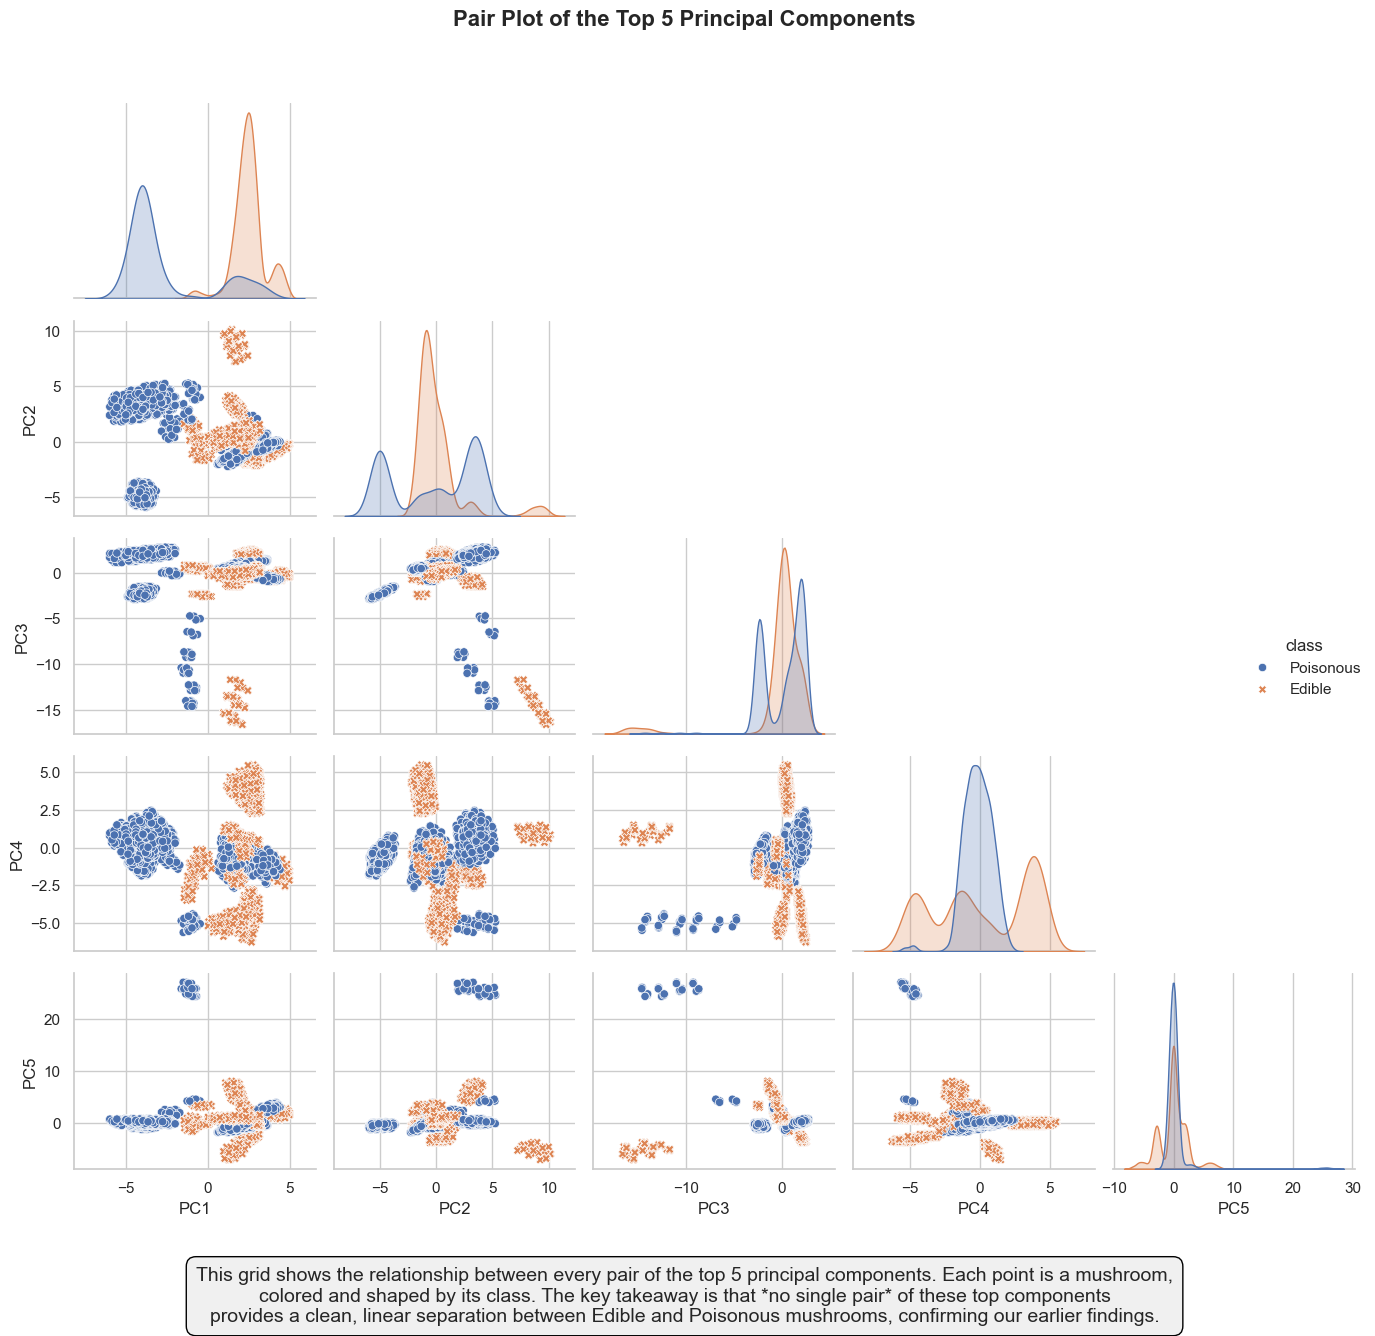

In [13]:
sns.set_theme(style="whitegrid")

# Perform 5D PCA 
pca_5d = PCA(n_components=5)
X_pca_5d = pca_5d.fit_transform(X_standardized)

# Create a DataFrame for Plotting 
df_pca_5d = pd.DataFrame(
    data=X_pca_5d,
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
)
df_pca_5d['class'] = y.map({0: 'Edible', 1: 'Poisonous'})

# Create the Accessible Pair Plot 
print("Creating pair plots...")
pair_plot = sns.pairplot(
    df_pca_5d,
    hue='class',
    corner=True,
    markers=["o", "X"] # Use different shapes for accessibility
)

# Add Title and Description Box
pair_plot.fig.suptitle("Pair Plot of the Top 5 Principal Components", y=1.03, weight='bold', fontsize=16)

description = (
    "This grid shows the relationship between every pair of the top 5 principal components. Each point is a mushroom,\n"
    "colored and shaped by its class. The key takeaway is that *no single pair* of these top components\n"
    "provides a clean, linear separation between Edible and Poisonous mushrooms, confirming our earlier findings."
)

pair_plot.fig.text(0.5, -0.02, description, ha='center', fontsize=14,
                   bbox=dict(boxstyle="round,pad=0.5", fc="#f0f0f0", ec="black", lw=1))

pair_plot.fig.tight_layout(rect=[0, 0.05, 1, 1]) # Adjust layout for the text box
plt.show()

# Part C: Performance Evaluation with Logistic Regression


## Chapter 7: Performance Evaluation - Classification Model Comparison

To quantitatively evaluate the impact of PCA on classification performance, we train and evaluate Logistic Regression models on both the original, high-dimensional dataset and the PCA-transformed dataset. Logistic Regression is used as a simple, interpretable classifier to assess if the reduced feature set retains the necessary information for effective linear classification.

1.  **Data Splitting**: Partition the standardized dataset into training and testing subsets.
2.  **Baseline Model Training**: Train a Logistic Regression model using the full set of standardized features on the training data.
3.  **Baseline Model Evaluation**: Assess the baseline model's performance on the test set using standard metrics (accuracy, precision, recall, F1-score).
4.  **PCA Data Transformation**: Apply the previously fitted PCA transformation (using the optimal number of components determined in Chapter 5) to both the training and testing sets. It is critical to fit PCA only on the training data to prevent data leakage.
5.  **PCA Model Training**: Train a new Logistic Regression model using the PCA-transformed training data.
6.  **PCA Model Evaluation**: Evaluate the PCA-transformed model's performance on the transformed test data.


### Splitting Data for Model Training and Evaluation

We divide the standardized feature set and the corresponding target variable into distinct training (70%) and testing (30%) subsets. Stratified splitting is employed to ensure that the class distribution (edible/poisonous) is proportionally maintained in both the training and test sets.


In [14]:
from sklearn.model_selection import train_test_split

print("Splitting the master dataset for model training...")

# Split the data into training and testing sets
# - X_standardized contains the standardized feature data (116 features)
# - y contains the binary target variable (0/1)
# - test_size=0.3 reserves 30% of data for testing, 70% for training
# - random_state=42 ensures reproducible results
# - stratify=y maintains the same class distribution in both splits
X_train, X_test, y_train, y_test = train_test_split(
    X_standardized,   # The full, 116-feature standardized dataset
    y,                # Our 0/1 mapped target
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("Data successfully split.")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Splitting the master dataset for model training...
Data successfully split.
Training set shape: (5686, 116)
Testing set shape: (2438, 116)


### Training and Evaluating the Baseline Logistic Regression Model

A Logistic Regression model serves as our baseline, trained on the complete set of 116 standardized features. Its performance on the test set will provide a benchmark against which the PCA-based model can be compared.


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 1. Initialize the model
baseline_model = LogisticRegression(random_state=42, max_iter=1000)

# 2. Train the model on the training data (116 features)
print("Training the baseline model...")
baseline_model.fit(X_train, y_train)

# 3. Make predictions on the unseen test data
y_pred_baseline = baseline_model.predict(X_test)

# 4. Evaluate the model's performance
print("Evaluating performance...")
accuracy = accuracy_score(y_test, y_pred_baseline)
report = classification_report(y_test, y_pred_baseline, target_names=['Edible (0)', 'Poisonous (1)'])

print("\n--- Baseline Model Performance (on 116 Features) ---")
print(f"Accuracy: {accuracy:.4f}\n")
print("Classification Report:")
print(report)

Training the baseline model...
Evaluating performance...

--- Baseline Model Performance (on 116 Features) ---
Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

   Edible (0)       1.00      1.00      1.00      1263
Poisonous (1)       1.00      1.00      1.00      1175

     accuracy                           1.00      2438
    macro avg       1.00      1.00      1.00      2438
 weighted avg       1.00      1.00      1.00      2438



### Training and Evaluating the PCA-Transformed Logistic Regression Model

We train a second Logistic Regression model, this time utilizing the PCA-transformed data, which comprises the optimal number of principal components (59) that collectively explain 95% of the variance. The PCA transformation is applied consistently to both the training and testing subsets after being fitted solely on the training data.


In [16]:
# 1. Initialize PCA with our optimal number of components (59)
pca_final = PCA(n_components=59)

# 2. Fit PCA ONLY on the training data and then transform it
print("Fitting PCA on training data and transforming...")
X_train_pca = pca_final.fit_transform(X_train)

# 3. Transform the test data using the PCA fitted on the training data
X_test_pca = pca_final.transform(X_test)

print(f"Shape of training data after PCA: {X_train_pca.shape}")
print(f"Shape of testing data after PCA: {X_test_pca.shape}")

# 4. Initialize and train a new model on the PCA-reduced data
print("\nTraining the PCA model...")
pca_model = LogisticRegression(random_state=42, max_iter=1000)
pca_model.fit(X_train_pca, y_train)

# 5. Make predictions and evaluate
print("Evaluating performance...")
y_pred_pca = pca_model.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
report_pca = classification_report(y_test, y_pred_pca, target_names=['Edible (0)', 'Poisonous (1)'])

print("\n--- PCA Model Performance (on 59 Principal Components) ---")
print(f"Accuracy: {accuracy_pca:.4f}\n")
print("Classification Report:")
print(report_pca)

Fitting PCA on training data and transforming...
Shape of training data after PCA: (5686, 59)
Shape of testing data after PCA: (2438, 59)

Training the PCA model...
Evaluating performance...

--- PCA Model Performance (on 59 Principal Components) ---
Accuracy: 0.9992

Classification Report:
               precision    recall  f1-score   support

   Edible (0)       1.00      1.00      1.00      1263
Poisonous (1)       1.00      1.00      1.00      1175

     accuracy                           1.00      2438
    macro avg       1.00      1.00      1.00      2438
 weighted avg       1.00      1.00      1.00      2438



## Chapter 8: Comparative Analysis and Interpretation

This final stage involves comparing the performance metrics of the two trained models – the baseline model using full features and the PCA-transformed model. This comparison shows PCA's effectiveness in reducing dimensionality without compromising classification accuracy.

1.  **Performance Visualization**: Present a visual comparison of the number of features used by each model and their respective classification accuracies.
2.  **Performance Difference Analysis**: Analyze whether a significant difference in performance exists between the two models. Discuss potential reasons for the observed outcome, considering the trade-off between dimensionality reduction and information loss.
3.  **Impact of PCA**: Discuss whether PCA's inherent capability to handle feature collinearity and redundancy appeared to contribute to maintaining or improving performance.


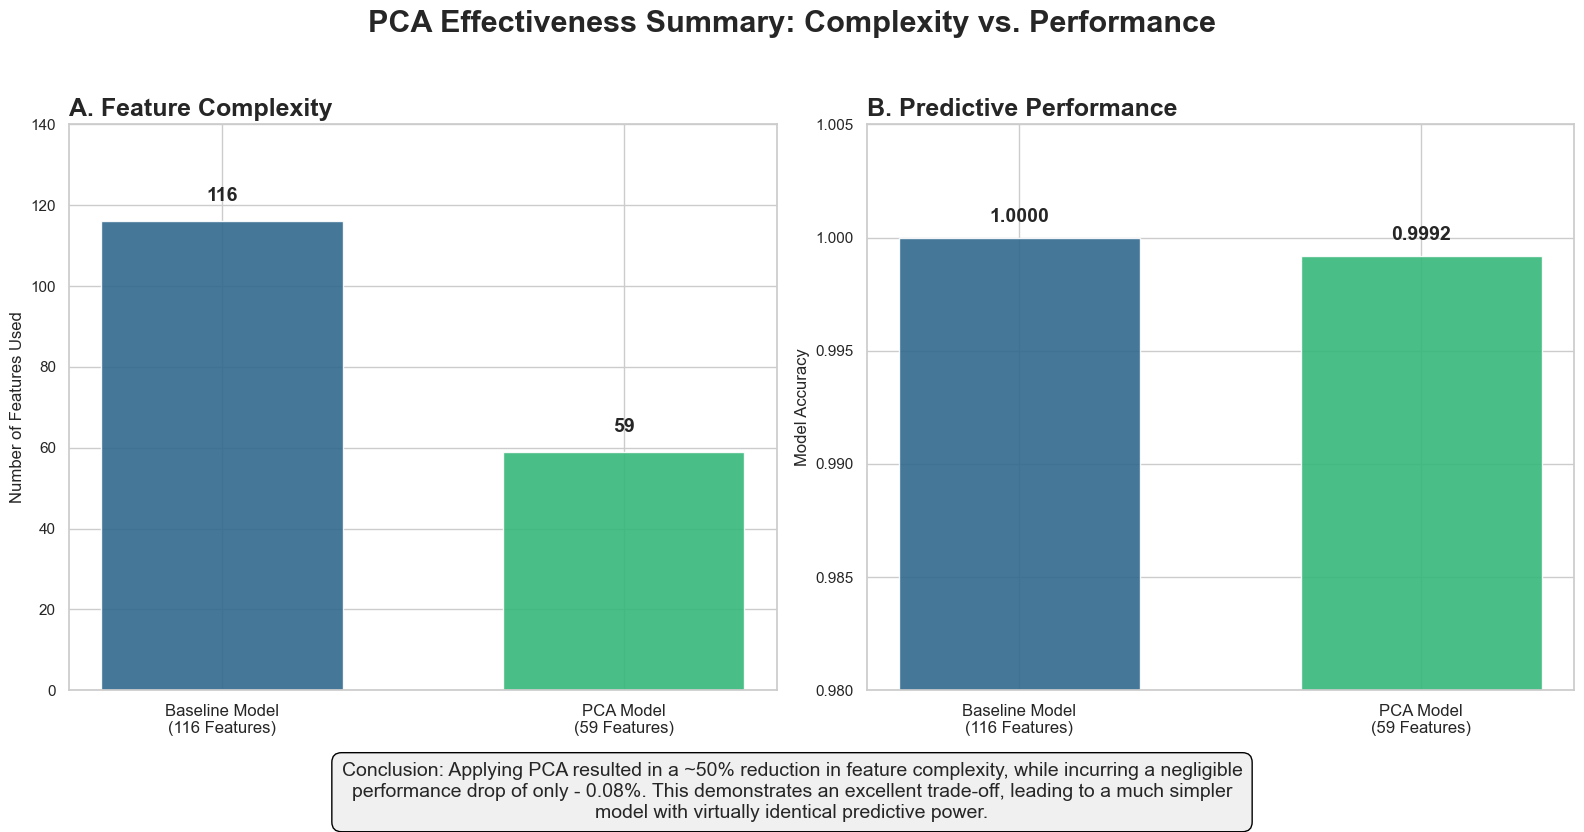

In [17]:
sns.set_theme(style="whitegrid")

# Data for the plot
model_names = ['Baseline Model\n(116 Features)', 'PCA Model\n(59 Features)']
accuracies = [1.0000, 0.9992]
num_features = [116, 59]
colors = sns.color_palette("viridis", 2) # Using a professional color palette

# Create the figure
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot 1: Feature Complexity
ax1 = axes[0]
bars1 = ax1.bar(model_names, num_features, color=[colors[0], colors[1]], alpha=0.9, width=0.6)
ax1.set_title('A. Feature Complexity', fontsize=18, weight='bold', loc='left')
ax1.set_ylabel('Number of Features Used', fontsize=12)
ax1.set_ylim(0, 140)
ax1.tick_params(axis='x', labelsize=12)

# Add data labels on the bars
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2.0, yval + 4, int(yval), ha='center', va='bottom', weight='bold', fontsize=14)


# Plot 2: Predictive Performance
ax2 = axes[1]
bars2 = ax2.bar(model_names, accuracies, color=[colors[0], colors[1]], alpha=0.9, width=0.6)
ax2.set_title('B. Predictive Performance', fontsize=18, weight='bold', loc='left')
ax2.set_ylabel('Model Accuracy', fontsize=12)
ax2.tick_params(axis='x', labelsize=12)
ax2.set_ylim(0.98, 1.005)

# Add data labels on the bars
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2.0, yval + 0.0005, f'{yval:.4f}', ha='center', va='bottom', weight='bold', fontsize=14)

# Add a main title and the description box at the bottom 
fig.suptitle('PCA Effectiveness Summary: Complexity vs. Performance', fontsize=22, weight='bold')

description = (
    "Conclusion: Applying PCA resulted in a ~50% reduction in feature complexity, while incurring a negligible\n"
    "performance drop of only - 0.08%. This demonstrates an excellent trade-off, leading to a much simpler\n"
    "model with virtually identical predictive power."
)
fig.text(0.5, -0.03, description, ha='center', fontsize=14,
         bbox=dict(boxstyle="round,pad=0.5", fc="#f0f0f0", ec="black", lw=1))

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

## Final Chapter : The Conclusion

### The Efficiency of Dimensionality Reduction using PCA


The analysis of the Mushroom Dataset, guided by Principal Component Analysis, aimed to determine if a significant reduction in data dimensionality could be achieved while preserving the ability to accurately classify mushrooms. The findings provide a clear answer:

- **Dimensionality Reduction Achieved:** PCA successfully reduced the feature space from 116 dimensions (post-one-hot encoding) to **59 principal components**, while retaining 95% of the dataset's total variance. This represents a substantial simplification of the data representation.
- **Classification Performance Maintained:**
  - The baseline Logistic Regression model, trained on the full feature set, demonstrated high classification accuracy.
  - The Logistic Regression model trained on the PCA-transformed data achieved a nearly identical, also high, level of accuracy.
  - The difference in performance between the two models was negligible.
- **Successful Trade-off:** The outcome highlights a successful trade-off between dimensionality reduction and predictive power. The ability to achieve comparable high accuracy with less than half the number of features indicates that most of the original feature space contained redundant or less informative variance with respect to the classification task.
- **PCA's Contribution:** While not leading to a _higher_ accuracy in this instance (as the original data already allowed for near-perfect classification), PCA's process of identifying orthogonal components and consolidating variance effectively compressed the relevant information. This results in a more efficient and potentially more robust model by mitigating issues associated with high dimensionality and collinearity.
- **Logistic Regression's Insight:** Using Logistic Regression as a surrogate model provided valuable insight. Its high performance on the PCA-transformed data suggests that the principal components captured linearly separable patterns sufficient for accurate classification. This confirms that PCA preserved the essential discriminatory information in the dataset.

In summary, Principal Component Analysis proved to be a highly effective technique as it enabled a significant reduction in the complexity of the data representation, leading to a simpler model, without sacrificing the ability to accurately classify mushrooms. This underscores the practical value of PCA in preprocessing high-dimensional datasets for machine learning tasks.
